# Predicting Car Prices

In the project we will predict any car market price using its attributes. The dataset we will be working with contains information on various cars. For each car we have informaition about the technical aspects of the vehicle such as the motors's displacement, the weight of the car, the miles per gallon, how fast the car accelrated, and more. TMore inforamtion about the data set can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile) and it can be downloaded directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) 

## Exploring the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns=99

In [3]:
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It seems the columns values were not added to the datset, we can set this maually

In [4]:
columns_cars = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore',
           'stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [5]:
cars.columns = columns_cars

In [6]:
cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
# Rows that are numeric
cars.dtypes[(cars.dtypes==int)|(cars.dtypes==float)]

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
compression_ratio    float64
city_mpg               int64
highway_mpg            int64
dtype: object

In [8]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


From observations, the features columns will be symboling, wheel_base, length,width,height,curb_weight,engine_size,city_mpg,highway_mpg. While the target column is price

## Handling missing values

The normalized_losses column contains missing vaues, hence pandas cast the columns as object as against integer

In [9]:
import numpy as np

In [10]:
# lets replace all ? with nan
cars = cars.replace('?',np.nan)

In [11]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [12]:
# converting columns to numeric
cars["price"].describe() #price is stored as string,let us chnage it
cars['price'] = cars["price"].astype(float)
cars['normalized_losses'] = cars['normalized_losses'].astype(float)


In [13]:
# numbers of null values in normalized_losses
norm_null = cars['normalized_losses'].isnull().sum()
norm_null/len(cars)*100
norm_null

40

since we have few missing values for `normalized_losses` we could drop rows that corresponds to the missing rows

In [14]:
cars_price_null=cars['price'].isnull().sum()
cars_price_null

4

In [15]:
percentage_of_price_null = (cars_price_null/len(cars))*100
percentage_of_price_null

1.9607843137254901

we have about 2 percent of prices that are missing and this is what we want to predict we can remove price rows with missing values

In [16]:
cars.dropna(subset=['price'],inplace=True)
cars.isnull().sum()

symboling             0
normalized_losses    36
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [17]:
# replace missing values in other columns using column means
cars.fillna(cars.mean(),inplace=True)
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Keeping only numerical columns, regresion models takes only numeric columns 

In [18]:
num=['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars_numeric = cars[num]

In [19]:
#converting all columns to numeric from object
cars_numeric = cars_numeric.astype(float)
cars_numeric = cars_numeric.fillna(cars_numeric.mean())
cars_numeric.isna().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Let's start with some simple univariate k-nearest neighbors models. 

We will create a function, named knn_train_test, that encapsulates the training and simple validation process. This function will have 3 parameters -- training column name,target column name, and the dataframe object.
- The function will split the data set inot a training and test.
- Then it will instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.

In [20]:
cars_numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [21]:
# defining the function 
def knn_train_test(column_name,target_name,dataframe):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    import numpy as np
    np.random.seed(1)
    reshuffle_index = np.random.permutation(dataframe.index)
    random_dataframe = dataframe.reindex(reshuffle_index)
    train_index = int(len(random_dataframe)/2)
    train_set = random_dataframe.iloc[0:train_index]
    test_set = random_dataframe.iloc[train_index:]
    knn = KNeighborsRegressor() 
    training_model = knn.fit(train_set[[str(column_name)]],train_set[str(target_name)])
    testing_model = knn.predict(test_set[[str(column_name)]])
    rmse = sqrt(mean_squared_error(test_set[str(target_name)],testing_model))
    return rmse
    


In [22]:
rmse_dictionary = {}
train_data = cars_numeric.columns.drop('price') # removing price from train column

In [23]:
knn_train_test('length','price',cars_numeric)

5150.4491768776825

In [24]:
for col in train_data:
    predictions = knn_train_test(col,'price',cars_numeric)
    rmse_dictionary[col]=predictions
pd.Series(rmse_dictionary)

bore                 6226.394081
city_mpg             3835.348412
compression_ratio    7193.588599
curb_weight          3433.993621
engine_size          3247.180990
height               7382.791462
highway_mpg          3753.829108
horsepower           4461.757845
length               5150.449177
normalized_losses    8142.019197
peak_rpm             6551.491059
stroke               8161.142818
wheel_base           5443.857347
width                3779.239622
dtype: float64

From here we could see that city_mpg,curb_weight,engine_size,highway_mpg,width have similar low rmse,which curb_weight has the lowest. This could be an indication that this features are likely to predict the price well. But let us still continue, next we will modify the knn_train_test function to accept a parameter for the value of k `(the number of neighbors)` amd test it on a univariate model



In [25]:
def knn_train_test2(column,label,df):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    import numpy as np
    k_values = [1,3,5,7,9]
    rmse_dictionary = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        random_df = df.sample(frac=1,random_state=1)
        index = int(len(random_df)*0.5)
        train_set = random_df.iloc[:index]
        test_set = random_df.iloc[index:]
        training_model = knn.fit(train_set[[column]],train_set[label])
        testing_model = knn.predict(test_set[[column]])
        rmse = np.sqrt(mean_squared_error(test_set[label],testing_model))
        rmse_dictionary[k] = rmse
    return rmse_dictionary

In [26]:
column_rmse_dictionary = {}
for col in train_data:
    rmse_val = knn_train_test2(col,'price',cars_numeric)
    column_rmse_dictionary[col]= rmse_val

In [27]:
series_col= pd.Series(column_rmse_dictionary)

In [28]:
series_col.head()

bore                 {1: 5926.514010782393, 3: 5927.911351770069, 9...
city_mpg             {1: 4170.034286429789, 3: 3461.6351235924462, ...
compression_ratio    {1: 7344.202947903877, 3: 5943.417906577177, 9...
curb_weight          {1: 4390.877922466076, 3: 3680.286562816059, 9...
engine_size          {1: 3398.1555291069303, 3: 3143.6417681833063,...
dtype: object

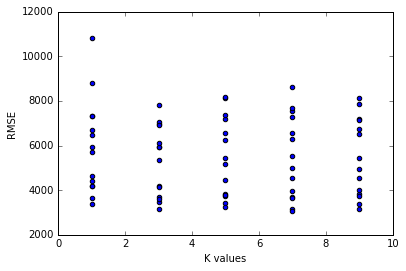

In [29]:
for k, v in series_col.items():
    x = list(v.keys())
    y = list(v.values())
    plt.scatter(x,y)
    plt.xlabel('K values')
    plt.ylabel('RMSE')


From here we could see that, we have a slighter shorter swill plot when k was equal to 3 and 7

In [30]:
def train_test3(list_columns,label,df):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    knn = KNeighborsRegressor()
    df_random = df.sample(frac=1,random_state=1)
    index = int(len(df_random)*0.5)
    train_set = df_random.iloc[0:index]
    test_set = df_random.iloc[index:]
    training_model = knn.fit(train_set[list_columns],train_set[label])
    predictions = knn.predict(test_set[list_columns])
    rmse = sqrt(mean_squared_error(test_set[label],predictions))
    return rmse
    

In [31]:
best_two_features_rmse = train_test3(["engine_size","curb_weight"],'price',cars_numeric)

In [32]:
best_three_features_rmse = train_test3(["engine_size","curb_weight","highway_mpg"],'price',cars_numeric)

In [33]:
best_four_features_rmse = train_test3(["engine_size","curb_weight","highway_mpg","width"],'price',cars_numeric)

In [34]:
best_five_features_rmse = train_test3(["engine_size","curb_weight","highway_mpg","width","city_mpg"],'price',cars_numeric)

In [35]:
best_2_5_features = {}
bests_list = [best_two_features_rmse,best_three_features_rmse,best_four_features_rmse,best_five_features_rmse]
bests_list

[3250.265705384715, 3266.5771960876727, 3266.5771960876727, 3266.9088473356583]

In [36]:
def train_test4(list_columns,label,df):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    k_dictionary = {}
    for k in range(1,26):
        knn = KNeighborsRegressor(n_neighbors=k)
        df_random = df.sample(frac=1,random_state=1)
        index = int(len(df_random)*0.5)
        train_set = df_random.iloc[0:index]
        test_set = df_random.iloc[index:]
        training_model = knn.fit(train_set[list_columns],train_set[label])
        predictions = knn.predict(test_set[list_columns])
        rmse = sqrt(mean_squared_error(test_set[label],predictions))
        k_dictionary[k]=rmse
    return k_dictionary

In [37]:
best_3_models = train_test4(["engine_size","curb_weight","highway_mpg"],"price",cars_numeric)

In [38]:
best_3_models

{1: 3953.4460082313,
 2: 4035.5735425711177,
 3: 3417.473765322371,
 4: 3317.459449450739,
 5: 3266.5771960876727,
 6: 3240.406459029827,
 7: 3127.4288871342274,
 8: 3076.536101943629,
 9: 3189.151132867743,
 10: 3302.7548284727404,
 11: 3319.8949191152037,
 12: 3456.54974430589,
 13: 3459.091756311168,
 14: 3559.2103296752985,
 15: 3609.5725643226947,
 16: 3638.1242534948124,
 17: 3715.8216975606188,
 18: 3815.0119888651966,
 19: 3894.386310296234,
 20: 3936.156643056143,
 21: 3929.3727397298953,
 22: 3918.167065802222,
 23: 3972.857047559132,
 24: 4022.7895768786802,
 25: 4040.8389079160283}

In [39]:
most_optimal_k_value = min(best_3_models,key=best_3_models.get)
'most optimal k value is {}'.format(most_optimal_k_value)

'most optimal k value is 8'

In [40]:
#using cross validation to check and setting k-fold as two
def knn_train_test_crossvalidate(column,label,df):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    knn = KNeighborsRegressor()
    from math import sqrt
    import numpy as np
    random_df = df.sample(frac=1,random_state=1)
    index = int(len(random_df)*0.5)
    train_set = random_df.iloc[0:index]
    test_set = random_df.iloc[index:]
    first_training = knn.fit(train_set[[column]],train_set[label])
    first_testing = knn.predict(test_set[[column]])
    first_rmse = sqrt(mean_squared_error(test_set[label],first_testing))
    second_training =knn.fit(test_set[[column]],test_set[label])
    second_testing = knn.predict(train_set[[column]])
    second_rmse = sqrt(mean_squared_error(train_set[label],second_testing))
    avg_rmse = (first_rmse+second_rmse)/2
    return avg_rmse
cross_validate_dict = {}
for col in train_data:
    rmse_col = knn_train_test_crossvalidate(col,'price',cars_numeric)
    cross_validate_dict[col]= rmse_col
pd.Series(cross_validate_dict)
                                         

bore                 6568.801113
city_mpg             4259.054276
compression_ratio    7082.352155
curb_weight          4060.957445
engine_size          3640.213424
height               7807.017665
highway_mpg          4230.346707
horsepower           4091.137136
length               5537.249102
normalized_losses    7788.092959
peak_rpm             7203.458098
stroke               8236.644276
wheel_base           6171.738202
width                4712.321484
dtype: float64

## Conclusion

In conclusion we can see that once the engine_size,curb_weight,highway_mpg of a car is known it is easy to predict the price.

This was shown by using both normal validation and cross validation to check the root mean squsred avearge and we got lower rmse for the 3 features